In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import seaborn as sns



In [10]:
#loading dataset
dataset = pd.read_csv (r'C:\Users\Mani\Desktop\Data Mining & ML\salary prediction dataset\ANZ.csv')
dataset.head()


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [202]:
#checking null values
pd.isnull(dataset).sum()

customer_id        0
age                0
txn_description    0
amount             0
balance            0
dtype: int64

In [12]:
dataset.shape



(12043, 23)

In [13]:
dataset.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [17]:
#considering only numerical values for the model so selecting only those variables
dataset=dataset[["customer_id","age","txn_description","amount","balance"]]
dataset.head

<bound method NDFrame.head of           customer_id  age txn_description  amount   balance
0      CUS-2487424745   26             POS   16.25     35.39
1      CUS-2487424745   26       SALES-POS   14.19     21.20
2      CUS-2142601169   38             POS    6.42      5.71
3      CUS-1614226872   40       SALES-POS   40.90   2117.22
4      CUS-2487424745   26       SALES-POS    3.25     17.95
...               ...  ...             ...     ...       ...
12038    CUS-55310383   30             POS    9.79  14054.14
12039  CUS-2688605418   20       SALES-POS   63.87   9137.79
12040  CUS-2663907001   28             POS   43.96  45394.57
12041  CUS-1388323263   69       SALES-POS   30.77  11350.67
12042  CUS-3129499595   31       SALES-POS   22.36   5517.91

[12043 rows x 5 columns]>

In [83]:
#analysising the types of variables avaiable in txn_description
print(dataset['txn_description'].unique())


['POS' 'SALES-POS' 'PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']


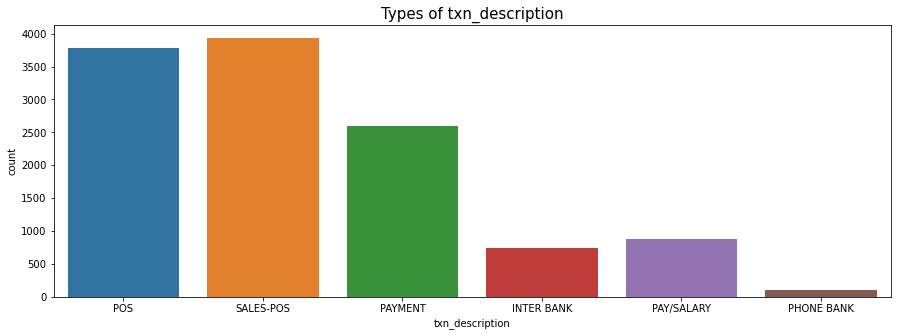

In [35]:
plt.figure(figsize=(15,5))
plt.title("Types of txn_description", size = 15)
sns.countplot(x='txn_description',data=dataset)
plt.show()


In [44]:
plot_customer= dataset.groupby(["customer_id"]).mean().reset_index()
plot_customer.head()
plot_customer.shape

(100, 4)

In [49]:
#creating new sub features of txn_description and analys the relation between eachother
# new variable is added pos with the mean values of amount associated wiht it
POS=dataset[dataset["txn_description"]==("POS"or"SALES-POS")].groupby("customer_id").mean().reset_index()
POS=POS[["customer_id","amount"]]
POS=POS.rename(columns = {'amount':'POS'})
POS.head()

,customer_id,POS
0,CUS-1005756958,28.769615
1,CUS-1117979751,23.321923
2,CUS-1140341822,34.781282
3,CUS-1147642491,54.271316
4,CUS-1196156254,31.157432


In [50]:
#same process is done to other variable 

In [55]:
Interbank=dataset[dataset["txn_description"]=='INTER BANK'].groupby("customer_id").mean().reset_index()
Interbank=Interbank[["customer_id","amount"]]
Interbank=Interbank.rename(columns = {'amount':'INTER BANK'})
Interbank.head()

,customer_id,INTER BANK
0,CUS-1117979751,1001.0000
1,CUS-1140341822,90.0000
2,CUS-1147642491,125.0000
3,CUS-1196156254,153.4000
4,CUS-1271030853,76.1875


In [60]:
phonebanking=dataset[dataset["txn_description"]=='PHONE BANK'].groupby("customer_id").mean().reset_index()
phonebanking=phonebanking[["customer_id","amount"]]
phonebanking=phonebanking.rename(columns = {'amount':'Phone Banking'})
phonebanking.head()

,customer_id,Phone Banking
0,CUS-1005756958,182.0
1,CUS-1646183815,150.0
2,CUS-1896554896,1916.0
3,CUS-2155701614,82.0
4,CUS-2348881191,1629.0


In [62]:
Payment=dataset[dataset["txn_description"]=="PAYMENT"].groupby("customer_id").mean().reset_index()
Payment=Payment[["customer_id","amount"]]
Payment=Payment.rename(columns = {'amount':'Payment'})
Payment.head()

,customer_id,Payment
0,CUS-1005756958,144.000000
1,CUS-1117979751,98.925000
2,CUS-1140341822,142.000000
3,CUS-1147642491,96.185185
4,CUS-1196156254,43.100000


In [63]:
pay=dataset[dataset["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean().reset_index()
pay=pay[["customer_id","amount"]]
pay=pay.rename(columns = {'amount':'Salary'})
pay.head()

,customer_id,Salary
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65
2,CUS-1140341822,1916.51
3,CUS-1147642491,1711.39
4,CUS-1196156254,3903.73


In [67]:
customerinfo=dataset.groupby("customer_id").mean().reset_index()
customerinfo=customerinfo[["customer_id","age","balance"]]
customerinfo.head()

,customer_id,age,balance
0,CUS-1005756958,53.0,2275.852055
1,CUS-1117979751,21.0,9829.929000
2,CUS-1140341822,28.0,5699.212250
3,CUS-1147642491,34.0,9032.841186
4,CUS-1196156254,34.0,22272.433755


In [220]:
merged_df=pd.merge(customerinfo,Payment,on="customer_id")
merged_df=pd.merge(merged_df,POS,on="customer_id")
merged_df=pd.merge(merged_df,pay,on="customer_id")
merged_df=pd.merge(merged_df,phonebanking,on="customer_id")
merged_df=pd.merge(merged_df,Interbank,on="customer_id")
merged_df.head()


,customer_id,age,balance,Payment,POS,Salary,Phone Banking,INTER BANK
0,CUS-1896554896,35.0,9525.844516,55.400000,45.003902,2308.67,1916.0,56.375000
1,CUS-2155701614,35.0,14164.792871,86.041667,30.173529,2443.24,82.0,80.142857
2,CUS-2348881191,41.0,4435.502975,27.720000,44.580000,2101.51,1629.0,54.647059
3,CUS-2376382098,39.0,12140.713741,52.741935,37.153721,5103.51,177.0,25.000000
4,CUS-3180318393,27.0,6138.652540,38.604651,29.144815,1396.23,67.0,140.000000


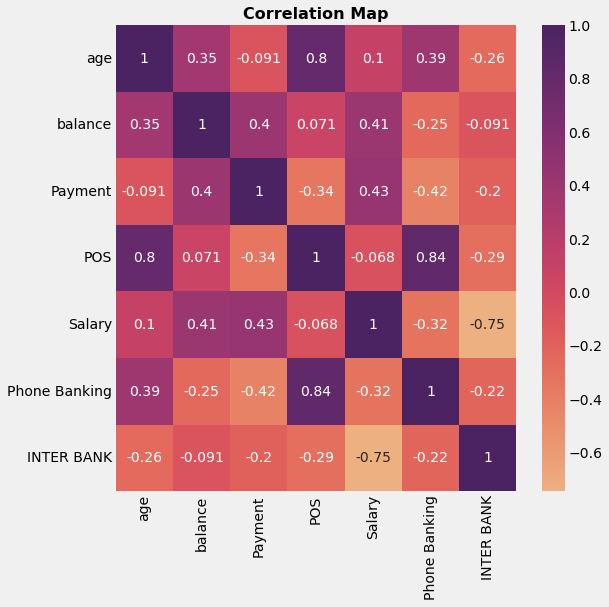

In [226]:
correlation=merged_df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(merged_df.corr(), cmap='flare', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)
plt.show()

In [219]:
final_df=pd.merge(customerinfo,Payment,on="customer_id")
final_df=pd.merge(final_df,POS,on="customer_id")
final_df=pd.merge(final_df,pay,on="customer_id")
final_df.head()

,customer_id,age,balance,Payment,POS,Salary
0,CUS-1005756958,53.0,2275.852055,144.000000,28.769615,970.47
1,CUS-1117979751,21.0,9829.929000,98.925000,23.321923,3578.65
2,CUS-1140341822,28.0,5699.212250,142.000000,34.781282,1916.51
3,CUS-1147642491,34.0,9032.841186,96.185185,54.271316,1711.39
4,CUS-1196156254,34.0,22272.433755,43.100000,31.157432,3903.73


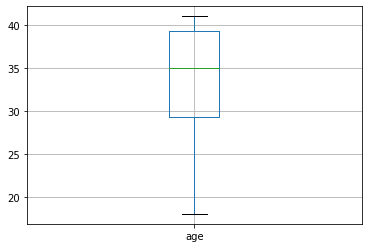

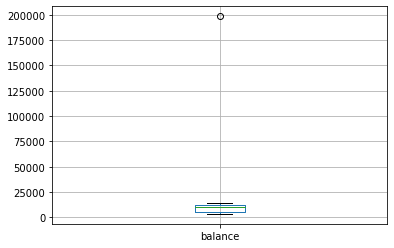

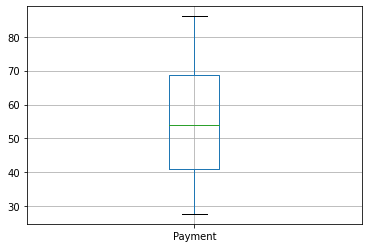

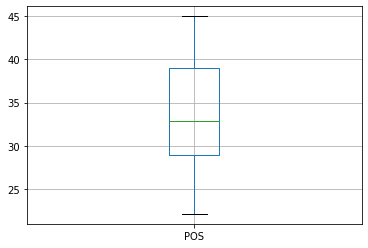

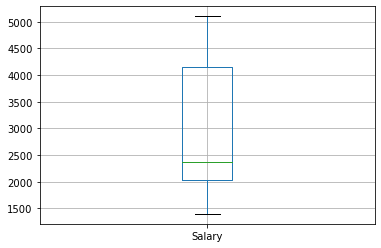

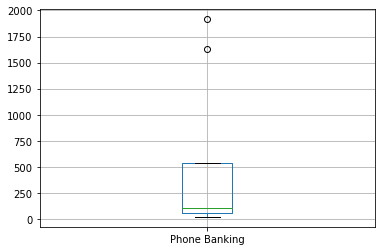

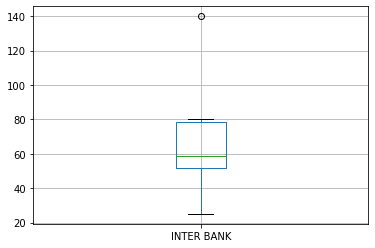

In [78]:
#checking for outliers
for column in merged_df._get_numeric_data():
    plt.figure()
    merged_df.boxplot([column])


<AxesSubplot:xlabel='age', ylabel='Salary'>

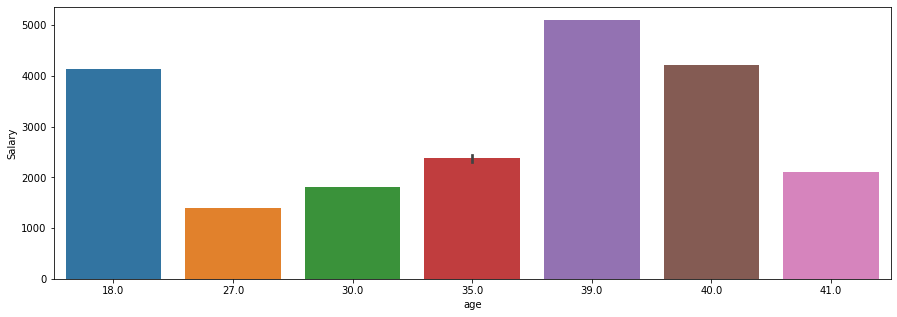

In [96]:
plt.figure(figsize=(15, 5))
sns.barplot(x="age", y="Salary", data=merged_df)

<AxesSubplot:xlabel='balance', ylabel='Salary'>

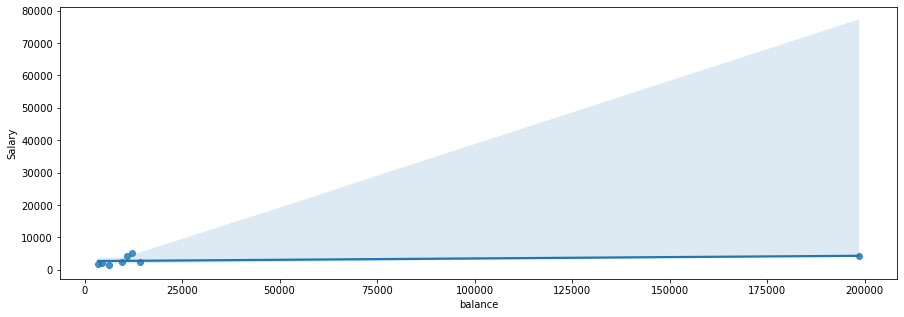

In [106]:
plt.figure(figsize=(15, 5))
sns.regplot(x="balance",y= "Salary", fit_reg=True, data=merged_df)

<AxesSubplot:xlabel='POS', ylabel='Salary'>

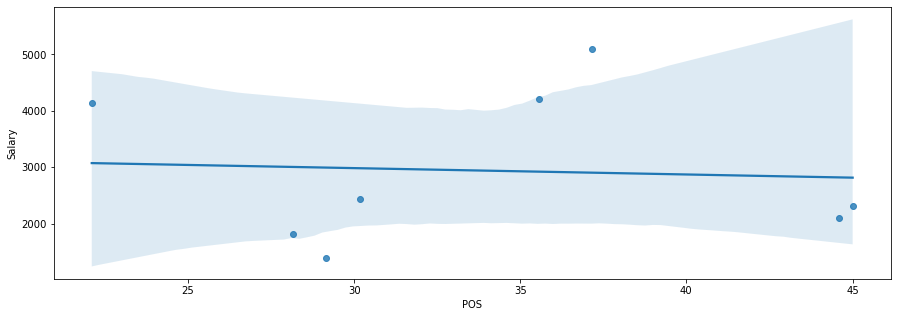

In [105]:
plt.figure(figsize=(15, 5))
sns.regplot(x="POS",y= "Salary", fit_reg=True, data=merged_df)

##Linear Regression


In [234]:
#defining variable to machine learning
X=final_df[["age","balance","Payment","POS"]].values
y=final_df["Salary"].values

In [236]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [237]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [238]:
y_prediction=LR.predict(X_test)#prediction using test sample
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error

In [242]:
LR.score(X_test,y_test)

0.07666219584715894

In [241]:
print('R2score of  Linear Regression model: ', r2_score(y_test, y_prediction))
print("RMSE value of linear Regression :",sqrt(mean_squared_error(y_test, y_prediction)))
print("MSE value of Linear Regression:",mean_squared_error(y_test, y_prediction))
print("Mean absoulte error of Linear Regression",mean_absolute_error(y_test, y_prediction))

R2score of  Linear Regression model:  0.07666219584715894
RMSE value of linear Regression : 1431.5583144017253
MSE value of Linear Regression: 2049359.207532709
Mean absoulte error of Linear Regression 1125.9989163311923


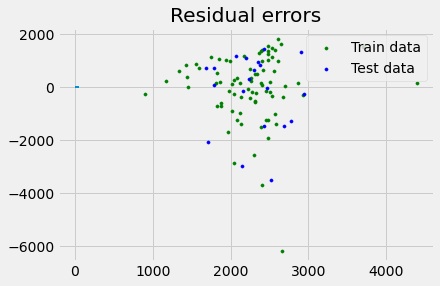

In [240]:
plt.style.use('fivethirtyeight')
plt.scatter(LR.predict(X_train), LR.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
##plotting residual errors in test data
plt.scatter(LR.predict(X_test), LR.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
#plotting zero residual error line
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [211]:
#lets predicit salary
#age=45
#balance=5500
#payment=150
#pos=45
print("Predicted Salary ",LR.predict([[45,5500,150,45]])[0])

Predicted Salary  1806.3672850895928


In [212]:
##Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
y_prediction=DTR.predict(X_test)#prediction using test sample

DTR.score(X_train,y_train)

1.0

In [233]:
print('R2 score of  Decision TreeRegression model: ', r2_score(y_test, y_prediction))
print("RMSE value of Decision Tree Regression :",sqrt(mean_squared_error(y_test, y_prediction)))
print("MSE value of Decision Tree Regression:",mean_squared_error(y_test, y_prediction))
print("Mean absoulte error of Decision Tree Regression",mean_absolute_error(y_test, y_prediction))

R2 score of  Decision TreeRegression model:  0.2742070031278463
RMSE value of Decision Tree Regression : 1269.2147827692522
MSE value of Decision Tree Regression: 1610906.1648000001
Mean absoulte error of Decision Tree Regression 1054.4060000000002


In [214]:
DTR.predict(X_test)

array([1043.12, 2639.76, 3517.61, 2572.91, 3071.14, 2647.38, 2840.15,
        916.75, 2470.45, 1272.47,  576.  , 2500.  , 3026.95, 2639.76,
       3676.94, 2443.24, 2023.68, 3676.94, 2218.73, 3517.61])

In [215]:
DTR.score(X_test,y_test)

0.2742070031278463

In [216]:
#lets predicit salary
#age=45
#balance=5500
#payment=150
#pos=45
print("Predicted Salary ",DTR.predict([[45,5500,150,45]])[0])

Predicted Salary  1272.47


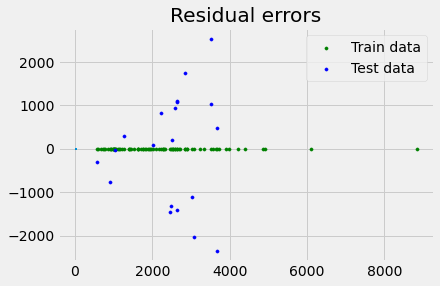

In [228]:
plt.style.use('fivethirtyeight')
plt.scatter(DTR.predict(X_train), DTR.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
##plotting residual errors in test data
plt.scatter(DTR.predict(X_test), DTR.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
#plotting zero residual error line
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()